In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import numpy as np

import sys
sys.path.append("../")

In [106]:
all_tires = {
    "cornering_Hoosier_16x6.0-10_R20_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    # "cornering_Hoosier_16x6.0-10_LCO_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None},
    # "cornering_Hoosier_16x6.0-10_LCO_7":{"long":None, "lat":None},
    # "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None},
    # "braking_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_8":{"long":None, "lat":None},
    # "cornering_Hoosier_16x7.5-10_LCO_8":{"long":None, "lat":None}
}

In [107]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
    except:
        print("Error getting lateral data for {0}".format(name))

In [108]:
peak_mu_lst = []
tire_name = []

normal_loads = sorted(np.array(tire["lat"]["load"].unique()))

for name, tire in all_tires.items():
    peak_mu = []
    for load in normal_loads:
        temp = tire["lat"][tire["lat"]["load"] == load]

        peak_mu.append(max(temp["FY"]) * 2/3 / abs(load))

    peak_mu_lst.append(peak_mu)
    tire_name.append(name)


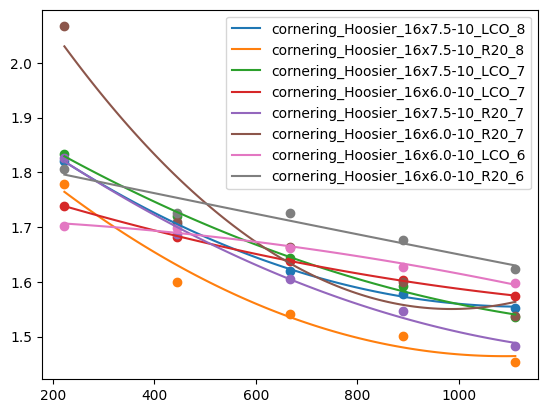

In [109]:
tire_names = tire_name[::-1]

for i in range(len(peak_mu_lst)):
    reversed_mu = peak_mu_lst[i][::-1]
    adjusted_FZ = sorted(-1 * np.array(normal_loads))
    plot = UnivariateSpline(adjusted_FZ, reversed_mu, k = 2)
    plt.scatter(adjusted_FZ, reversed_mu)
    x_vals = np.linspace(min(adjusted_FZ), max(adjusted_FZ), 100)
    y_vals = plot(x_vals)

    plt.plot(x_vals, y_vals)
plt.legend(tire_names)

0       0.072284
1       0.088100
2       0.104586
3       0.121631
4       0.140205
          ...   
7471   -0.065154
7472   -0.045932
7473   -0.026564
7474   -0.009523
7475    0.006446
Length: 3738, dtype: float64
2492    0.066081
2493    0.086351
2494    0.104827
2495    0.126946
2496    0.147576
          ...   
3733   -0.076587
3734   -0.054796
3735   -0.035808
3736   -0.015679
3737    0.001351
Length: 1246, dtype: float64
3738    0.086294
3739    0.110357
3740    0.132566
3741    0.157114
3742    0.183780
          ...   
4979   -0.086947
4980   -0.060434
4981   -0.038124
4982   -0.012826
4983    0.014018
Length: 1246, dtype: float64
4984    0.094023
4985    0.129424
4986    0.163471
4987    0.203725
4988    0.251237
          ...   
6225   -0.159187
6226   -0.116892
6227   -0.079260
6228   -0.040152
6229    0.013614
Length: 1246, dtype: float64
7476    0.093156
7477    0.124170
7478    0.154057
7479    0.182544
7480    0.216860
          ...   
8716   -0.124963
8717   -0.090522


C:\Users\rober\AppData\Local\Temp\ipykernel_19472\342944481.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_mu.append(temp["FY"] / temp["FZ"])
C:\Users\rober\AppData\Local\Temp\ipykernel_19472\342944481.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_mu.append(temp["FY"] / temp["FZ"])
C:\Users\rober\AppData\Local\Temp\ipykernel_19472\342944481.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_mu.append(temp["FY"] / temp["FZ"])
C:\Users\rober\AppData\Local\Temp\ipykernel_19472\342944481.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_mu.append(temp["FY"] / temp["FZ"])


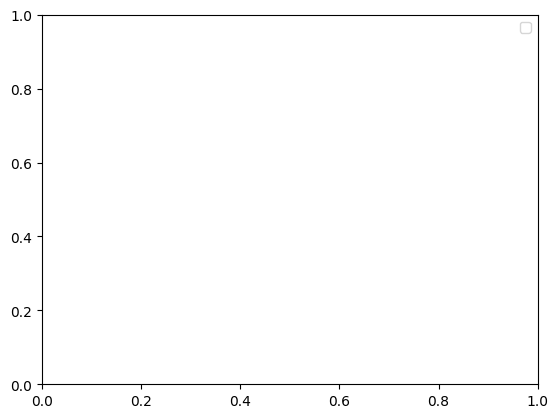

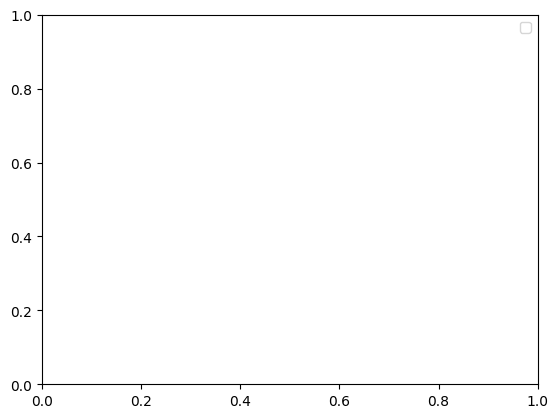

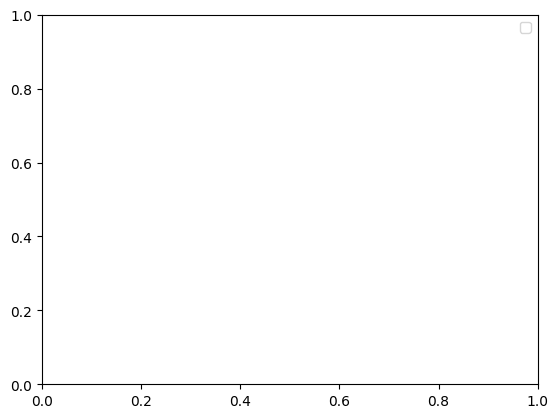

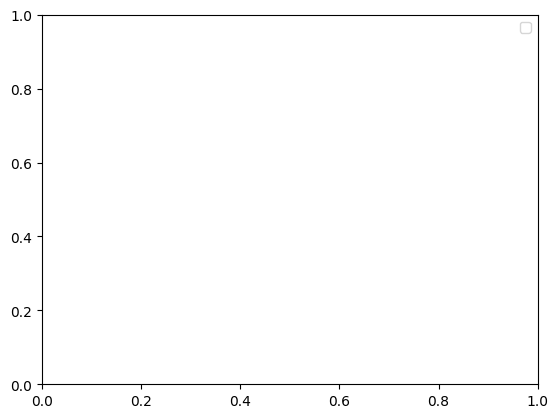

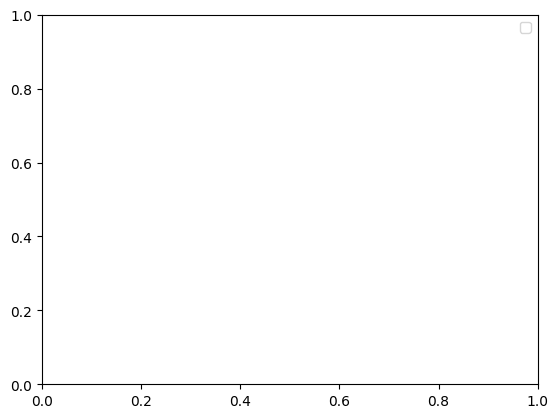

In [ ]:
tire_lst = []
peak_mu = []

normal_loads = tire["lat"]["load"].unique()

for item in normal_loads:
    plt.figure()
    for name, tire in all_tires.items():
        temp = tire["lat"][tire["lat"]["load"] == item]

        peak_mu.append(temp["FY"] / temp["FZ"])
        
        peak_mu = temp["FY"] / temp["FZ"]

        print(peak_mu)
        break

        # plt.plot(temp["SA"], temp["FY"] / temp["FZ"])
        # tire_lst.append(name)

        # plt.title(f"FY vs SA at {round(item) * -1} N Normal Load")
        # plt.xlabel("SA (deg)")
        # plt.ylabel("FY (N)")

    plt.legend(tire_lst)